<a href="https://colab.research.google.com/github/supermandee/GIS-x-Galvanize-Insurance-Fraud-Classification-Model/blob/main/Datathon_Team_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the Libraries

In [ ]:
# basic operations
import numpy as np 
import pandas as pd
import datetime as dt
import seaborn as sns
import io
# visualizations
import matplotlib.pyplot as plt
import plotly.express as px
pd.set_option('display.max_columns', None)
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, precision_score, classification_report, average_precision_score
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split

# Loading & Reading the Dataset

In [ ]:
# Importing the data
from google.colab import files 
uploaded = files.upload()

Saving insurance_claims.csv to insurance_claims.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['insurance_claims.csv']))
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,22-02-2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,24-01-2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,23-01-2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,26-02-2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [ ]:
# Changing binary representation of our target variable to 1/0

df.fraud_reported = df.fraud_reported.map({'Y':1, 'N':0})

# Preliminary Exploratory Data Analysis

In [ ]:
# The first 5 rows of the dataset

df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,1
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,1
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,0
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,0


In [ ]:
# The number of frauds reported

df.fraud_reported.value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

In [ ]:
# Showing how many columns and rows there are in the dataset

df.shape

(1000, 39)

In [ ]:
# This shows us the information about the dataset and data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [ ]:
# Descriptive Statistics: showing the count, mean, std, min/max of our dataset

df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,0.247000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,0.431483
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,0.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,0.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,0.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,0.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,1.000000


# Data Pre-Processing / Cleaning

In [ ]:
# Show if the dataset has null values

df.isnull().any()

months_as_customer             False
age                            False
policy_number                  False
policy_bind_date               False
policy_state                   False
policy_csl                     False
policy_deductable              False
policy_annual_premium          False
umbrella_limit                 False
insured_zip                    False
insured_sex                    False
insured_education_level        False
insured_occupation             False
insured_hobbies                False
insured_relationship           False
capital-gains                  False
capital-loss                   False
incident_date                  False
incident_type                  False
collision_type                 False
incident_severity              False
authorities_contacted          False
incident_state                 False
incident_city                  False
incident_location              False
incident_hour_of_the_day       False
number_of_vehicles_involved    False
p

In [ ]:
# The dataset has ?, we need to replace it with NaN 

df = df.replace('?',np.NaN)
df.isnull().any()

months_as_customer             False
age                            False
policy_number                  False
policy_bind_date               False
policy_state                   False
policy_csl                     False
policy_deductable              False
policy_annual_premium          False
umbrella_limit                 False
insured_zip                    False
insured_sex                    False
insured_education_level        False
insured_occupation             False
insured_hobbies                False
insured_relationship           False
capital-gains                  False
capital-loss                   False
incident_date                  False
incident_type                  False
collision_type                  True
incident_severity              False
authorities_contacted          False
incident_state                 False
incident_city                  False
incident_location              False
incident_hour_of_the_day       False
number_of_vehicles_involved    False
p

In [ ]:
# There are null values in collision_type, so we replace them with the most popular type 

print(df.collision_type.value_counts())

# Rear collision is the most common so we will use this to replace NaN 

df['collision_type'].fillna('Rear Collision', inplace = True)

Rear Collision     292
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64


In [ ]:
# For property_damage and police_report_availabe, we will assume that N/A means No 

df['property_damage'].fillna('NO', inplace = True)
df['police_report_available'].fillna('NO', inplace = True)
df.isnull().any()

months_as_customer             False
age                            False
policy_number                  False
policy_bind_date               False
policy_state                   False
policy_csl                     False
policy_deductable              False
policy_annual_premium          False
umbrella_limit                 False
insured_zip                    False
insured_sex                    False
insured_education_level        False
insured_occupation             False
insured_hobbies                False
insured_relationship           False
capital-gains                  False
capital-loss                   False
incident_date                  False
incident_type                  False
collision_type                 False
incident_severity              False
authorities_contacted          False
incident_state                 False
incident_city                  False
incident_location              False
incident_hour_of_the_day       False
number_of_vehicles_involved    False
p

In [ ]:
# Converting to date time values

df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'], errors = 'coerce')
df['incident_date'] = pd.to_datetime(df['incident_date'], errors = 'coerce')

# Exploratory Data Analysis 

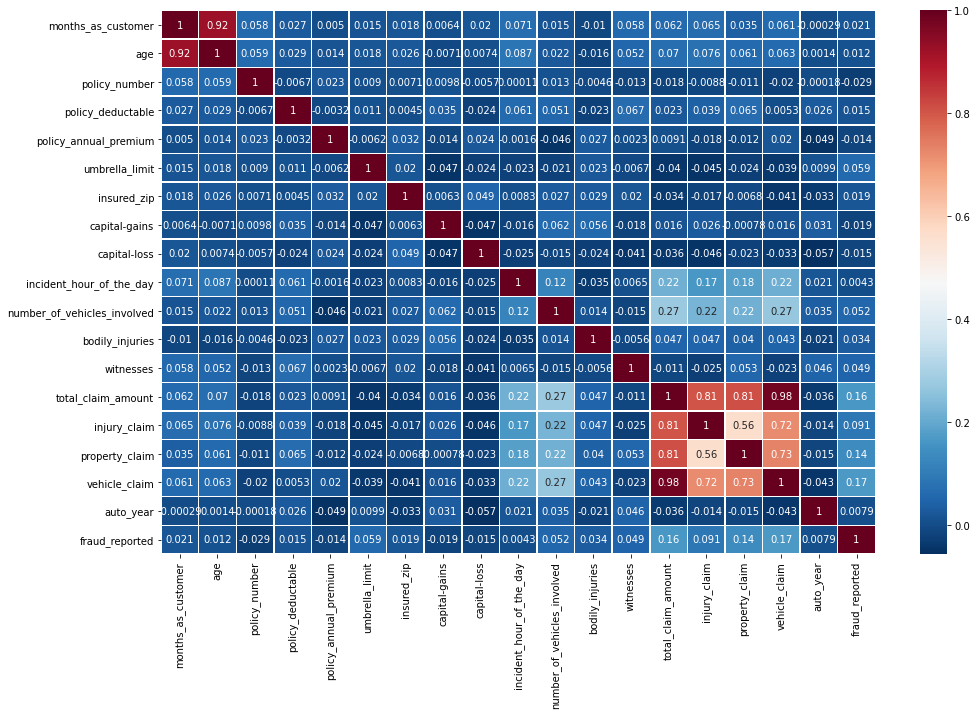

In [ ]:
# Use Pearson correlation to find pairwise correlation of all variables

pearson = df.corr(method='pearson')
pearson
plt.figure(figsize=(16, 10))
sns.heatmap(pearson, 
            xticklabels=pearson.columns,
            yticklabels=pearson.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

We noticed that some variables such as total_claim_amount, and vehicle_claim are more correlated to fraud_reported than other variables.

Because the heatmap only shows us numerical variables, we created the following graphs, which tell us more about the categorical variables and how they are related to the number of frauds reported. 

Text(0.5, 1.0, 'Number of Insurance Claims Reported by Incident Type')

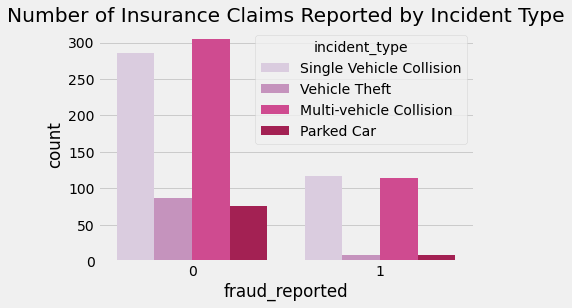

In [ ]:
plt.style.use('seaborn-pastel')
plt.rcParams['figure.figsize'] = (6, 4)

sns.countplot(x=df['fraud_reported'],hue='incident_type',data=df, palette = 'PuRd').set_title("Number of Insurance Claims Reported by Incident Type")

It seems that most insruance claims were around vehicle collisions.

Text(0.5, 1.0, 'Number of Insurance Claims Reported by Incident Severity')

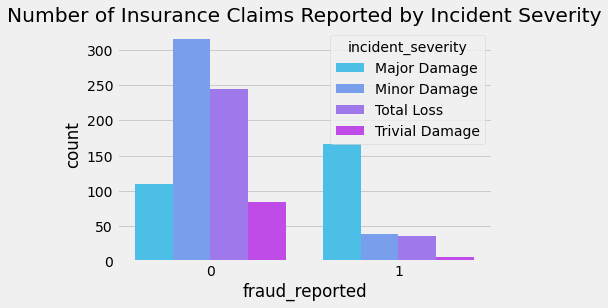

In [ ]:
plt.style.use('seaborn-pastel')
plt.rcParams['figure.figsize'] = (6, 4)

sns.countplot(x='fraud_reported', hue='incident_severity', data = df, palette='cool').set_title('Number of Insurance Claims Reported by Incident Severity')

The graph above shows us an interesting correlation. It seems that most frauds reported are major damage while most real cases consist of minor damages. This means that major damage might have a higher possibility of being fraud than other incident severities. This suggests that most people who are trying to fraud for insurance are trying to go big and get the big money from major damage, or this could be a case of survivorship bias where its mainly just the people who falsely claim for major damages are the ones getting caught majority of the time and getting put in the dataset, likely because its easier to get caught lying about major damages compared to total loss or trivial damage for example.

Text(0.5, 1.0, 'Vehicle Claim Amount by Auto Make')

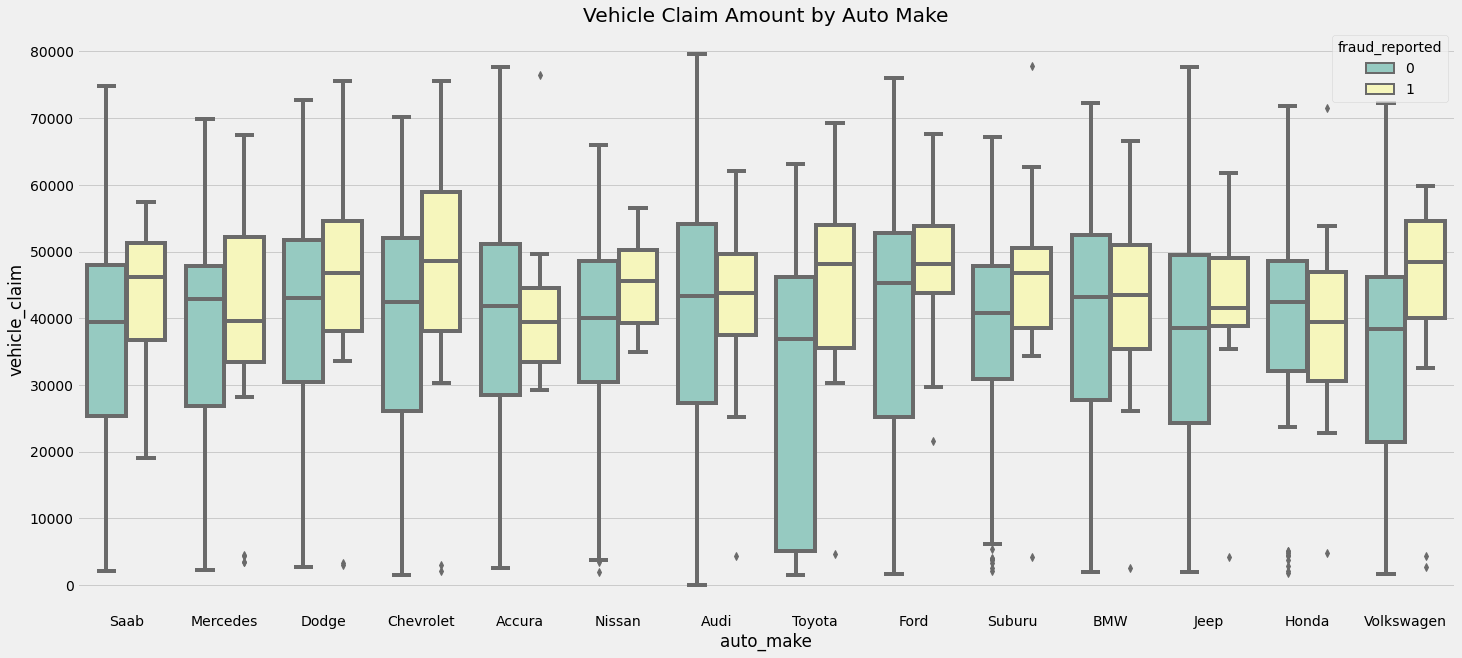

In [ ]:
plt.figure(figsize=(22, 10))
sns.boxplot(x="auto_make", y = 'vehicle_claim', hue = 'fraud_reported', data = df, palette="Set3").set_title('Vehicle Claim Amount by Auto Make')

These boxplots show the vehicle claim amount by auto companies. This graph shows that for most car brands, fraud insurance claims tend to have higher claim amounts with less deviation compared to legitamate insurance claims. Again this suggests that most of the people who were frauding were trying to go big and get the most cash. This makes sense as people wouldn't risk facing the consequences of insurance fraud over a tiny amount, they would much rather go big or go home.

# Data Processing with Catagorical Variables

In [ ]:
df2 = df.copy()

In [ ]:
# We define our own function to target encode all the categorical variables, replacing them with associated mean relation to fraud_reported. 
# This is because most models only take numerical variables.

def numericizer(df, col, new_df_name):
  new_df_name = df[[col,'fraud_reported']].groupby([col],as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)
  df[col] = df[col].replace(new_df_name[col].values, 1 - new_df_name['fraud_reported'].values)
  new_df_name = None

In [ ]:
lets_use_correlation = ['insured_occupation', 'insured_hobbies', 'auto_make',
                        'auto_model', 'police_report_available', 
                        'property_damage', 'policy_state','incident_city', 'incident_state',
                        'authorities_contacted', 'incident_severity', 'collision_type',
                        'incident_type','insured_relationship', 'insured_education_level', 
                        'insured_sex', 'policy_csl']

for i in lets_use_correlation:
  try:
    numericizer(df2, i, "blah")
  except: 
    print(i)
df2

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,0.741477,0.737892,1000,1406.91,0,466132,0.738661,0.736111,0.702703,0.804878,0.794118,53300,0,2015-01-25,0.709677,0.746377,0.394928,0.791096,0.705645,0.738255,9935 4th Drive,5,1,0.741722,1,2,0.770701,71610,6510,13020,52080,0.775000,0.714286,2004,1
1,228,42,342868,2006-06-27,0.745161,0.737892,2000,1197.22,5000000,468176,0.738661,0.736111,0.763441,0.734375,0.706215,0,0,2015-01-21,0.914894,0.772340,0.892655,0.791096,0.772727,0.776119,6608 MLK Hwy,8,1,0.757880,0,0,0.744898,5070,780,780,3510,0.661538,0.740741,2007,1
2,134,29,687698,2000-06-09,0.741477,0.742120,2000,1413.14,5000000,430632,0.765363,0.736000,0.723684,0.708333,0.786885,35100,0,2015-02-22,0.727924,0.772340,0.892655,0.791096,0.778626,0.738255,7121 Francis Lane,7,3,0.757880,2,3,0.744898,34650,7700,3850,23100,0.750000,0.674419,2007,0
3,256,41,227811,1990-05-25,0.772189,0.737892,2000,1415.74,6000000,608117,0.765363,0.736000,0.753623,0.708333,0.758865,48900,-62400,2015-10-01,0.709677,0.724409,0.394928,0.791096,0.565217,0.710526,6956 Maple Drive,5,1,0.757880,1,2,0.744898,63400,6340,6340,50720,0.723684,0.625000,2014,1
4,228,44,367455,2014-06-06,0.772189,0.783333,1000,1583.91,6000000,610706,0.738661,0.765517,0.723684,0.708333,0.758865,66000,-46000,2015-02-17,0.914894,0.772340,0.892655,0.934066,0.778626,0.710526,3041 3rd Ave,20,1,0.757880,0,1,0.744898,6500,1300,650,4550,0.808824,0.916667,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,0.741477,0.783333,1000,1310.80,0,431289,0.765363,0.776224,0.702703,0.771930,0.758865,0,0,2015-02-22,0.709677,0.724409,0.892655,0.730942,0.690909,0.778689,6045 Andromedia St,20,1,0.741722,0,1,0.744898,87200,17440,8720,61040,0.745455,0.769231,2006,0
996,285,41,186934,2014-05-01,0.772189,0.742120,1000,1436.79,0,608177,0.765363,0.736000,0.788235,0.804878,0.729032,70900,0,2015-01-24,0.709677,0.772340,0.394928,0.730942,0.705645,0.765517,3092 Texas Drive,23,1,0.741722,2,3,0.744898,108480,18080,18080,72320,0.720588,0.727273,2015,0
997,130,34,918516,2003-02-17,0.741477,0.737892,500,1383.49,3000000,442797,0.765363,0.776224,0.753623,0.839286,0.706215,35100,0,2015-01-23,0.727924,0.746377,0.892655,0.791096,0.690909,0.710526,7629 5th St,4,3,0.757880,2,3,0.770701,67500,7500,7500,52500,0.762500,0.700000,1996,0
998,458,62,533940,2011-11-18,0.772189,0.783333,2000,1356.92,5000000,441714,0.738661,0.765517,0.796296,0.734694,0.729032,0,0,2015-02-26,0.709677,0.772340,0.394928,0.681818,0.778626,0.710526,6128 Elm Lane,2,1,0.757880,0,1,0.770701,46980,5220,5220,36540,0.695652,0.656250,1998,0


# Feature Selection

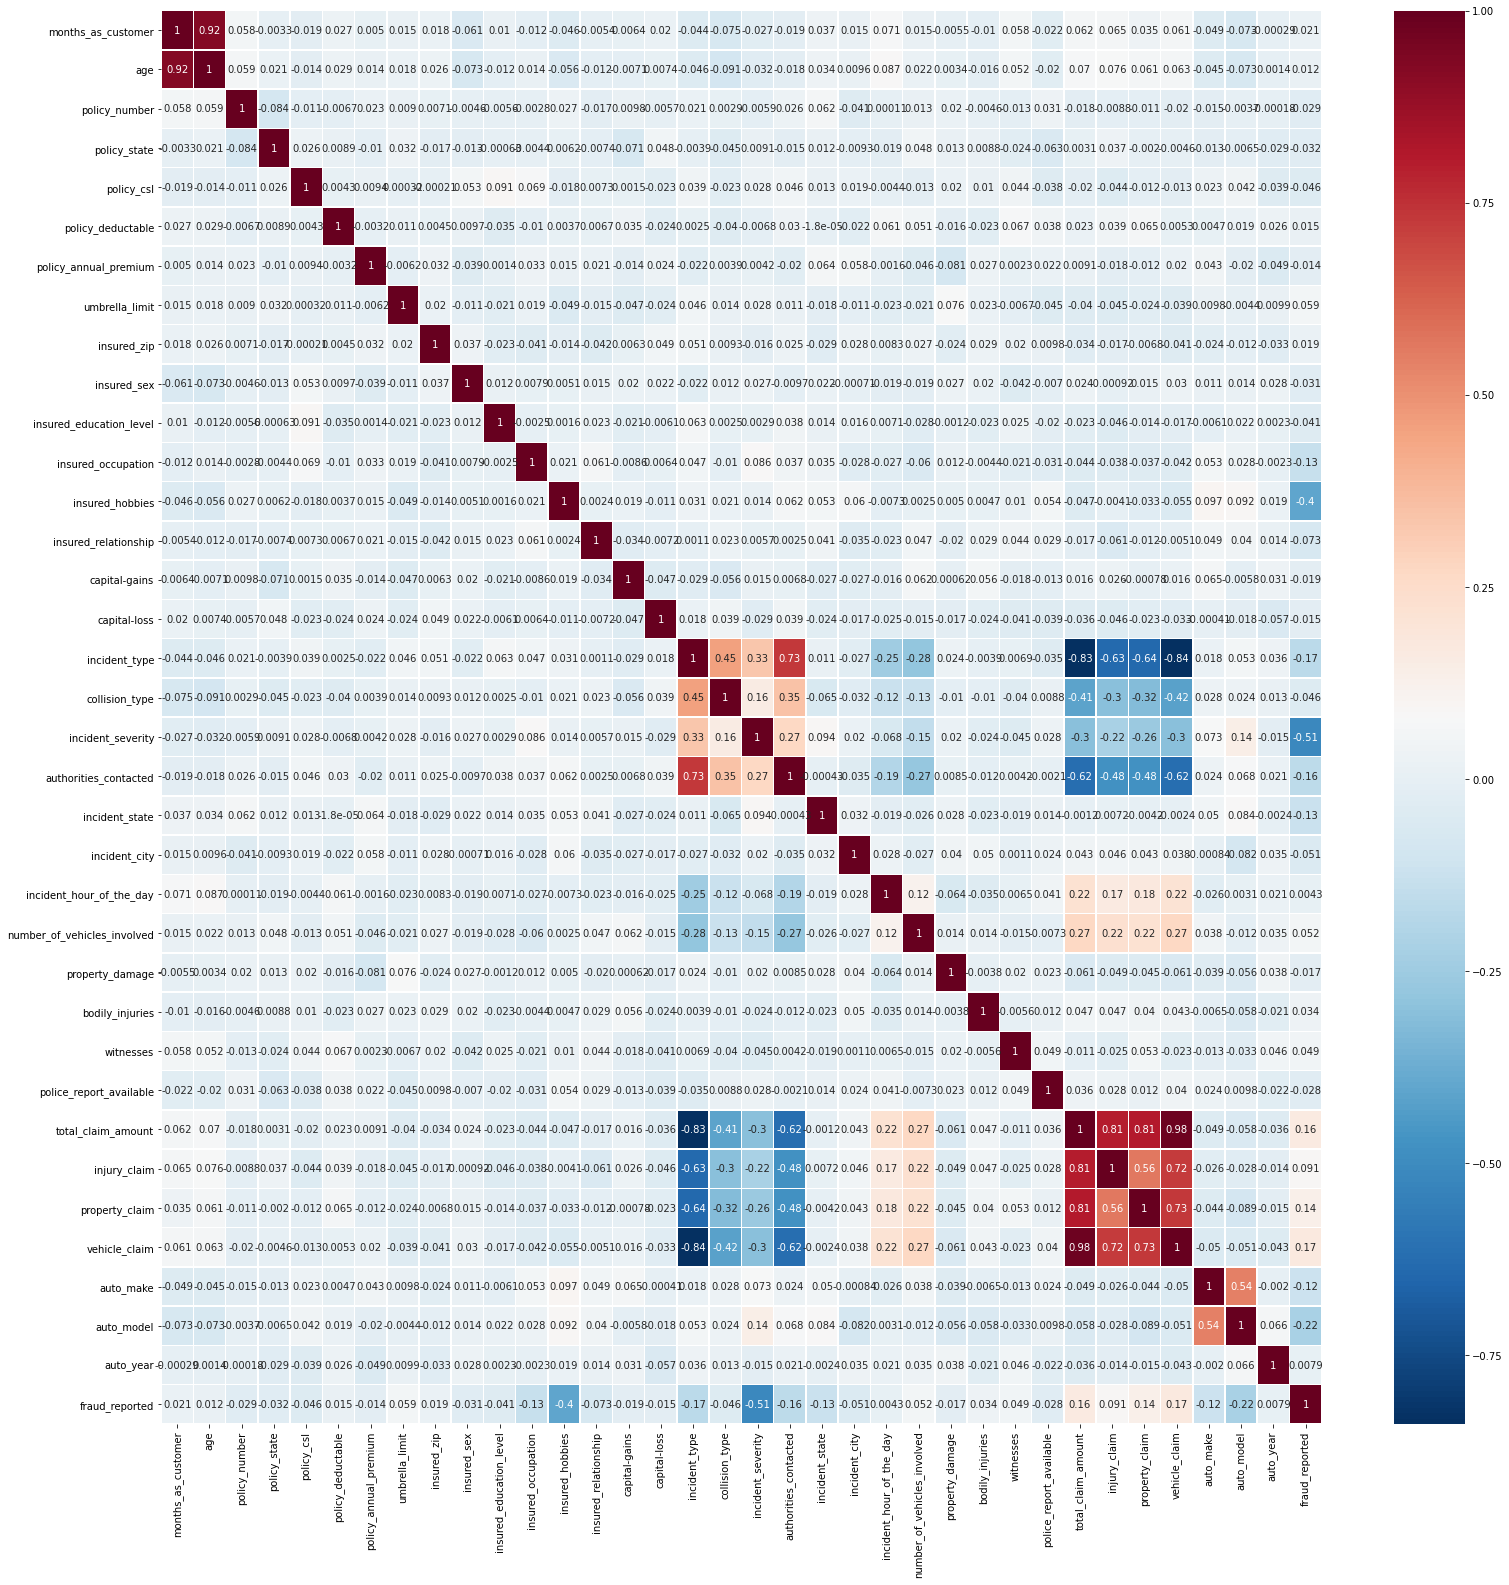

In [ ]:
# After we changed all the categorical variables to numerical using mean encoding, 
# we can run pairwise correlation again to see the correlation between all the variables
pearson = df2.corr(method='pearson')
pearson
plt.figure(figsize=(26, 26))
sns.heatmap(pearson, 
            xticklabels=pearson.columns,
            yticklabels=pearson.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

This heatmap again tells us how related the variables to fraud_reported. We will pick the ones that have an absolute correlation value greater than 0.1 for our model

In [ ]:
# Picking the features that have absolute correlation value greater than 0.1 
# We added injury_claim since it's 0.091, very close to 0.1

df3 = df2[['fraud_reported', 'insured_occupation', 'insured_hobbies', 'incident_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make', 'auto_model']]

In [ ]:
df3.head()

,fraud_reported,insured_occupation,insured_hobbies,incident_type,incident_severity,authorities_contacted,incident_state,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model
0,1,0.702703,0.804878,0.709677,0.394928,0.791096,0.705645,71610,6510,13020,52080,0.775000,0.714286
1,1,0.763441,0.734375,0.914894,0.892655,0.791096,0.772727,5070,780,780,3510,0.661538,0.740741
2,0,0.723684,0.708333,0.727924,0.892655,0.791096,0.778626,34650,7700,3850,23100,0.750000,0.674419
3,1,0.753623,0.708333,0.709677,0.394928,0.791096,0.565217,63400,6340,6340,50720,0.723684,0.625000
4,0,0.723684,0.708333,0.914894,0.892655,0.934066,0.778626,6500,1300,650,4550,0.808824,0.916667


Below we plotted all the features correlating to fraud_reported in such a way that makes it easy for us to imagine a logistic regression function going over the points and classifying whether there was fraud reported or not on the y-axis. It appears that no single graph would have a clean logistic function going over it, which means that our model will definitely need to take in multiple classes/features at once to predict the fraud_reported.

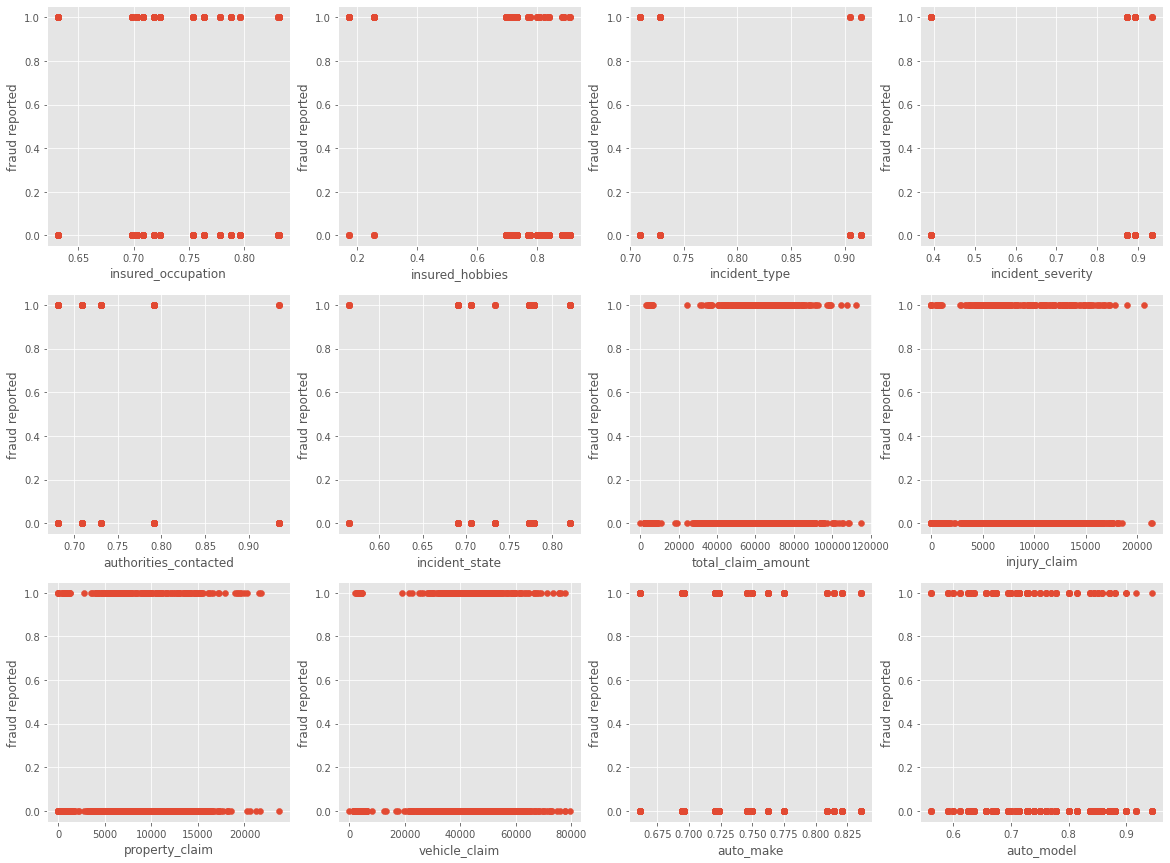

In [ ]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(20, 15))
for i in range(len(df3.columns)-1):
    sub = fig.add_subplot(3, 4, i + 1)
    sub.scatter(df3.iloc[:,i+1], df3['fraud_reported'])
    sub.set_xlabel(df3.columns[i+1])
    sub.set_ylabel("fraud reported")

# Modeling

In [ ]:
x = df3.drop('fraud_reported', axis = 1)
y = df3['fraud_reported']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (800, 12) (800,)
Test set: (200, 12) (200,)


We picked the logistic regression model to classify our data because our target feature, fraud_reported, is a binary feature. We used the 'newton-cg' solver because we are predicting fraud_reported using multiple features at once. Unfortunately, the solver could just not converge even when we increased the max_iter quite a bit, so we just left it at 200 so it can run faster.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=1.1, solver='newton-cg', max_iter=200, random_state=86).fit(x_train,y_train)
LR

/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.6/dist-packages/sc

LogisticRegression(C=1.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=86, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
yhat_train = LR.predict(x_train)
yhat_test = LR.predict(x_test)

# Scoring the Model

In [ ]:
# Create confusion matrix function

from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

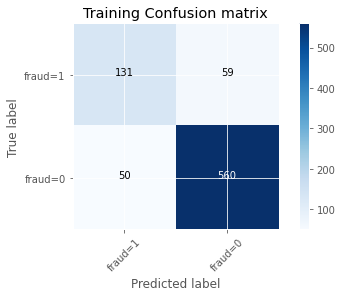

In [ ]:
# Compute confusion matrix for training data
cnf_matrix = confusion_matrix(y_train, yhat_train, labels=[1,0])
np.set_printoptions(precision=2)


# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['fraud=1','fraud=0'], normalize= False,  title='Training Confusion matrix')

In [ ]:
print (classification_report(y_train, yhat_train))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       610
           1       0.72      0.69      0.71       190

    accuracy                           0.86       800
   macro avg       0.81      0.80      0.81       800
weighted avg       0.86      0.86      0.86       800



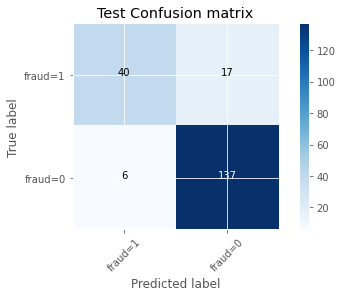

In [ ]:
# Compute confusion matrix for testing data
cnf_matrix = confusion_matrix(y_test, yhat_test, labels=[1,0])
np.set_printoptions(precision=2)


# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['fraud=1','fraud=0'],normalize= False,  title='Test Confusion matrix')

In [ ]:
print (classification_report(y_test, yhat_test))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       143
           1       0.87      0.70      0.78        57

    accuracy                           0.89       200
   macro avg       0.88      0.83      0.85       200
weighted avg       0.88      0.89      0.88       200



Our f1 score on the testing set was not less than the f1 score on the training set, so we likely did not overfit. In both scores, however, we noticed that our recall was relatively low. This means that we let a fair amount of insurance frauds go through undetected, increasing our number of false negatives. However, this is generous on the side of the people, as it is less likely that they would be falsely accused of insurance fraud, which would have lead to jail time and other serious consequences. 
